# Class defs

Esta tabla contiene la información de las definiciones de clases.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('classdefs')

# Table name, features and target.
TABLE_NAME = 'classdefs'
TABLE_FEATURES = ['classdef__name_convention', 'classdef__is_enum_class', 'classdef__number_of_characters', 'classdef__number_of_decorators', 'classdef__number_of_methods', 'classdef__number_of_base_classes', 'classdef__has_generic_type_annotations', 'classdef__has_doc_string', 'classdef__body_count', 'classdef__assignments_pct', 'classdef__expressions_pct', 'classdef__uses_meta_class', 'classdef__number_of_keywords', 'classdef__height', 'classdef__average_stmts_method_body', 'classdef__type_annotations_pct', 'classdef__private_methods_pct', 'classdef__magic_methods_pct', 'classdef__async_methods_pct', 'classdef__class_methods_pct', 'classdef__static_methods_pct', 'classdef__abstract_methods_pct', 'classdef__property_methods_pct', 'classdef__expertise_level']
TABLE_TARGET = 'classdef__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2024-05-19 12:55:21.633208 Data cache files found ...
2024-05-19 12:55:21.643555 Data cache files successfully loaded!!
Features shape: (22225, 24)
Target shape: (22225,)
As we can see the downloaded data contains a total of 22225 instances. For each instance we have 24 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22225 entries, 0 to 22224
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   classdef__name_convention               22225 non-null  object 
 1   classdef__is_enum_class                 22225 non-null  bool   
 2   classdef__number_of_characters          22225 non-null  int64  
 3   classdef__number_of_decorators          22225 non-null  int64  
 4   classdef__number_of_methods             22225 non-null  int64  
 5   classdef__number_of_base_classes        22225 non-null  int64  
 6   classdef__has_generic_type_annotations  22225 non-null  bool   
 7   classdef__has_doc_string                22225 non-null  bool   
 8   classdef__body_count                    22225 non-null  int64  
 9   classdef__assignments_pct               22225 non-null  float64
 10  classdef__expressions_pct               22225 non-null  fl

Cómo podemos ver la tabla está compuesta por 18 variables numéricas, 4 variables boleanas y dos de tipo objeto. 

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 34.83% instances for BEGINNER class and 65.17% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [44.33%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

classdef__name_convention                 0
classdef__is_enum_class                   0
classdef__number_of_characters            0
classdef__number_of_decorators            0
classdef__number_of_methods               0
classdef__number_of_base_classes          0
classdef__has_generic_type_annotations    0
classdef__has_doc_string                  0
classdef__body_count                      0
classdef__assignments_pct                 0
classdef__expressions_pct                 0
classdef__uses_meta_class                 0
classdef__number_of_keywords              0
classdef__height                          0
classdef__average_stmts_method_body       0
classdef__type_annotations_pct            0
classdef__private_methods_pct             0
classdef__magic_methods_pct               0
classdef__async_methods_pct               0
classdef__class_methods_pct               0
classdef__static_methods_pct              0
classdef__abstract_methods_pct            0
classdef__property_methods_pct  

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [6]:
print_empty_cols(X)

classdef__name_convention
-------------------------
0 instancias no tienen un valor para la columna classdef__name_convention


classdef__is_enum_class
-----------------------
0 instancias no tienen un valor para la columna classdef__is_enum_class


classdef__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_characters


classdef__number_of_decorators
------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_decorators


classdef__number_of_methods
---------------------------
0 instancias no tienen un valor para la columna classdef__number_of_methods


classdef__number_of_base_classes
--------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_base_classes


classdef__has_generic_type_annotations
--------------------------------------
0 instancias no tienen un valor para la columna classdef__has_generic_type_annotations


classdef__has_

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
classdef__name_convention,22225,7,CamelUp,19659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__is_enum_class,22225,2,False,21927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__number_of_characters,22225.0,NaN,NaN,NaN,13.960495,6.630411,1.0,9.0,13.0,18.0,52.0
classdef__number_of_decorators,22225.0,NaN,NaN,NaN,0.140022,0.3753,0.0,0.0,0.0,0.0,5.0
classdef__number_of_methods,22225.0,NaN,NaN,NaN,4.154061,6.467043,0.0,1.0,2.0,5.0,231.0
classdef__number_of_base_classes,22225.0,NaN,NaN,NaN,0.832936,0.612985,0.0,1.0,1.0,1.0,45.0
classdef__has_generic_type_annotations,22225,1,False,22225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__has_doc_string,22225,2,False,11484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__body_count,22225.0,NaN,NaN,NaN,5.768459,8.572848,1.0,2.0,3.0,7.0,618.0
classdef__assignments_pct,22225.0,NaN,NaN,NaN,0.157644,0.298455,0.0,0.0,0.0,0.181818,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "classdef__number_of_characters": [(0.0, 9.0), (9.0, 13.0), (13.0, 18.0), (18.0, inf)], # min: 1 ; max: 52
    "classdef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 5
    "classdef__number_of_methods": [(0.0, 1.0), (1.0, 2.0), (2.0, 5.0), (5.0, inf)], # min: 0 ; max: 231
    "classdef__number_of_base_classes": [(0.0, 0.0), (1.0, 1.0), (1.0, inf)], # min: 0 ; max: 45
    "classdef__body_count": [(0.0, 2.0), (2.0, 3.0), (3.0, 7.0), (7.0, inf)], # min: 1 ; max: 618
    "classdef__assignments_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__expressions_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__number_of_keywords": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 2.0
    "classdef__height": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 1.0 ; max: 8.0
    "classdef__average_stmts_method_body": [(0.0, 1.0), (1.0, 2.2), (2.2, 4.0), (4.0, inf)], # min: 0.0 ; max: 114.0
    "classdef__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__private_methods_pct": [(0.0, 0.0), (0.0, 0.25), (0.25, 0.50), (0.5, 1.0), (0.1, inf)], # min: 0.0 ; max: 1.0
    "classdef__magic_methods_pct": [(0.0, 0.0), (0.0, 0.50), (0.5, 1.0), (0.1, inf)], # min: 0.0 ; max: 1.0
    "classdef__async_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__class_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__static_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__abstract_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__property_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['classdef__number_of_characters'], 10))
print(get_statistics(X_copy, ['classdef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['classdef__number_of_methods'], 10))
print(get_statistics(X_copy, ['classdef__number_of_base_classes'], 10))
print(get_statistics(X_copy, ['classdef__body_count'], 10))
print(get_statistics(X_copy, ['classdef__assignments_pct'], 10))
print(get_statistics(X_copy, ['classdef__expressions_pct'], 10))
print(get_statistics(X_copy, ['classdef__number_of_keywords'], 10))
print(get_statistics(X_copy, ['classdef__height'], 10))
print(get_statistics(X_copy, ['classdef__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['classdef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['classdef__private_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__magic_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__async_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__class_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__static_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__abstract_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__property_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__name_convention'], 10))
print(get_statistics(X_copy, ['classdef__is_enum_class'], 10))
print(get_statistics(X_copy, ['classdef__has_generic_type_annotations'], 10))
print(get_statistics(X_copy, ['classdef__has_doc_string'], 10))
print(get_statistics(X_copy, ['classdef__uses_meta_class'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['classdef__assignments_pct', 'classdef__expressions_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
classdef__number_of_characters  count  percentage
                    [18.0_inf]   6085   27.379078
                   [13.0_18.0)   5995   26.974128
                    [9.0_13.0)   5537   24.913386
                     [0.0_9.0)   4608   20.733408

classdef__number_of_decorators  count  percentage
                     [0.0_0.0]  19307   86.870641
                     [0.0_inf]   2918   13.129359

classdef__number_of_methods  count  percentage
                  [2.0_5.0)   8254   37.138358
                  [5.0_inf]   6124   27.554556
                  [0.0_1.0)   4252   19.131609
                  [1.0_2.0)   3595   16.175478

classdef__number_of_base_classes  count  percentage
                       [1.0_1.0]  16336   73.502812
                       [0.0_0.0]   4935   22.204724
                       [1.0_inf]    954    4.292463

classdef__body_count  count  percentage
           [3.0_7.0)   8205   36.917885
           [7.0_inf]   5745   25.849269
          

### IMPORTANTE
7900 clases sin asignaciones ni expresiones. Serán prints? Hay que mirarlo en detalle

No hay generic type annotations -> Esta disponible solo desde Python 3.12?

In [9]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (22225, 31)
Target shape: (22225,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

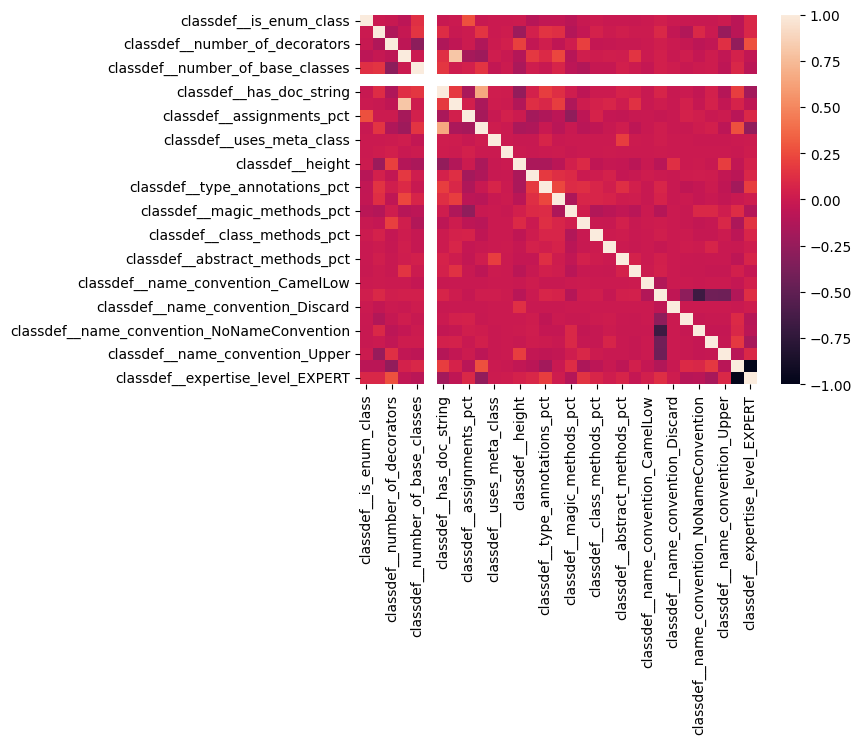

In [10]:
sns.heatmap(X.corr(), annot=False)

### IMPORTANTE
La relación entre private y magic methods pct es debido a que hasta ahora siempre que un metodo era magic se marcaba como privado tambien

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 23 variables (8 numericas, 10 procentuales, 4 booleanas y 1 categorica)

### Variable is_enum_class (1/23)
Esta variable es de tipo booleano y representa si la clase hereda de la clase Enum.

<Axes: xlabel='classdef__is_enum_class', ylabel='Count'>

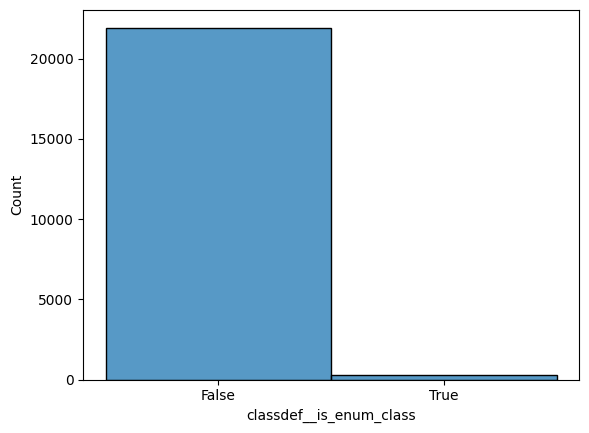

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__is_enum_class'], discrete=True)

In [12]:
num_true_values = len(X[X['classdef__is_enum_class'] == True])
num_false_values = len(X[X['classdef__is_enum_class'] == False])
std = X['classdef__is_enum_class'].std()
freq_true = len(X[X['classdef__is_enum_class'] == True]) / len(X['classdef__is_enum_class'])
freq_false = len(X[X['classdef__is_enum_class'] == False]) / len(X['classdef__is_enum_class'])
print(f'La variable is_enum_class contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_enum_class a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_enum_class a False es {freq_false}.')

La variable is_enum_class contiene 298 valores verdaderos y 21927 valores falsos. Y, la desviación típica es de 0.11501798033714294
La frecuencia con la que programa puede tener la variable is_enum_class a True es 0.013408323959505062.
La frecuencia con la que programa puede tener la variable is_enum_class a False es 0.9865916760404949.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__is_enum_class', possible_values)

La variable classdef__is_enum_class contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__is_enum_class toma el valor de 0.0 en un 98.66% de los items.
La variable classdef__is_enum_class toma el valor de 1.0 en un 1.341% de los items.


In [14]:
X[X['classdef__is_enum_class'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,298.0,298.000000,298.000000,298.000000,298.000000,298.0,298.000000,298.000000,298.000000,298.000000,...,298.000000,298.0,298.000000,298.0,298.0,298.000000,298.0,298.000000,298.0,298.0
mean,1.0,13.614094,0.070470,0.197987,1.526846,0.0,0.399329,5.419463,0.857085,0.103867,...,0.013423,0.0,0.963087,0.0,0.0,0.010067,0.0,0.026846,0.0,1.0
std,0.0,6.013627,0.269181,0.772679,0.500119,0.0,0.490584,5.452756,0.204797,0.150827,...,0.115270,0.0,0.188865,0.0,0.0,0.099997,0.0,0.161904,0.0,0.0
min,1.0,3.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0
25%,1.0,9.000000,0.000000,0.000000,1.000000,0.0,0.000000,3.000000,0.750000,0.000000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0
50%,1.0,13.000000,0.000000,0.000000,2.000000,0.0,0.000000,4.000000,1.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0
75%,1.0,17.000000,0.000000,0.000000,2.000000,0.0,1.000000,6.000000,1.000000,0.237500,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0
max,1.0,34.000000,2.000000,8.000000,2.000000,0.0,1.000000,41.000000,1.000000,0.600000,...,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,1.0


### Variable has_generic_type_annotations (2/23)
Esta variable es de tipo booleano y representa si la clase define un tipo genérico

<Axes: xlabel='classdef__has_generic_type_annotations', ylabel='Count'>

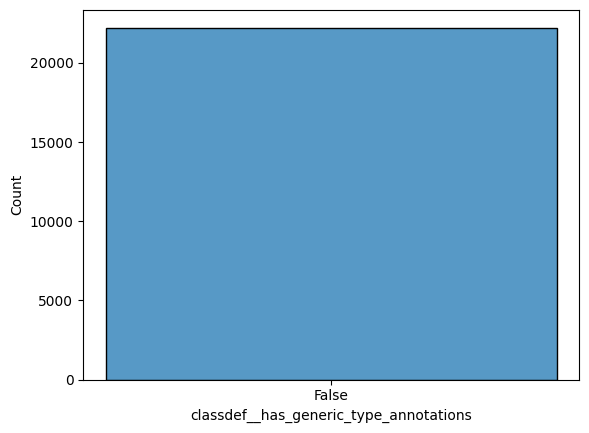

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__has_generic_type_annotations'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__has_generic_type_annotations'] == True])
num_false_values = len(X[X['classdef__has_generic_type_annotations'] == False])
std = X['classdef__has_generic_type_annotations'].std()
freq_true = len(X[X['classdef__has_generic_type_annotations'] == True]) / len(X['classdef__has_generic_type_annotations'])
freq_false = len(X[X['classdef__has_generic_type_annotations'] == False]) / len(X['classdef__has_generic_type_annotations'])
print(f'La variable has_generic_type_annotations contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_generic_type_annotations a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_generic_type_annotations a False es {freq_false}.')

La variable has_generic_type_annotations contiene 0 valores verdaderos y 22225 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable has_generic_type_annotations a True es 0.0.
La frecuencia con la que programa puede tener la variable has_generic_type_annotations a False es 1.0.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__has_generic_type_annotations', possible_values)

La variable classdef__has_generic_type_annotations contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__has_generic_type_annotations toma el valor de 0.0 en un 100.0% de los items.
La variable classdef__has_generic_type_annotations toma el valor de True en un 0.0% de los items. [OUTLIER]


In [18]:
X[X['classdef__has_generic_type_annotations'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
Esta propiedad es de python 3.12.

### Variable has_doc_string (3/23)
Esta variable es booleana y representa si el primer elemento del cuerpo de la clase es un doc_string. String planos usados como comentarios.

<Axes: xlabel='classdef__has_doc_string', ylabel='Count'>

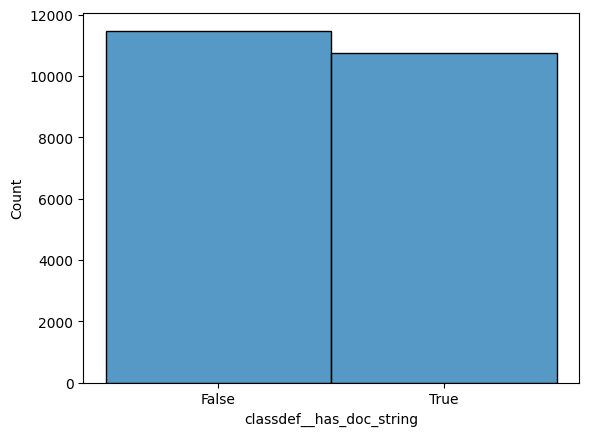

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__has_doc_string'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__has_doc_string'] == True])
num_false_values = len(X[X['classdef__has_doc_string'] == False])
std = X['classdef__has_doc_string'].std()
freq_true = len(X[X['classdef__has_doc_string'] == True]) / len(X['classdef__has_doc_string'])
freq_false = len(X[X['classdef__has_doc_string'] == False]) / len(X['classdef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 10741 valores verdaderos y 11484 valores falsos. Y, la desviación típica es de 0.49973174929618835
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.4832845894263217.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.5167154105736783.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__has_doc_string', possible_values)

La variable classdef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__has_doc_string toma el valor de 0.0 en un 51.67% de los items.
La variable classdef__has_doc_string toma el valor de 1.0 en un 48.33% de los items.


In [22]:
X[X['classdef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,10741.000000,10741.000000,10741.000000,10741.000000,10741.000000,10741.0,10741.0,10741.000000,10741.000000,10741.000000,...,10741.000000,10741.000000,10741.000000,10741.0,10741.000000,10741.000000,10741.000000,10741.000000,10741.000000,10741.000000
mean,0.011079,14.744531,0.088074,5.041151,0.933526,0.0,1.0,7.308072,0.108976,0.294138,...,0.038252,0.001117,0.906247,0.0,0.009589,0.045154,0.030351,0.007541,0.442510,0.557490
std,0.104677,6.353748,0.298145,7.765246,0.666332,0.0,0.0,10.742437,0.209694,0.243793,...,0.133932,0.033408,0.291498,0.0,0.097459,0.207652,0.171559,0.086516,0.496707,0.496707
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,0.004310,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,1.000000,1.000000,0.0,1.0,3.000000,0.000000,0.125000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,3.000000,1.000000,0.0,1.0,4.000000,0.000000,0.250000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,19.000000,0.000000,6.000000,1.000000,0.0,1.0,8.000000,0.125000,0.333333,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,50.000000,2.000000,231.000000,45.000000,0.0,1.0,618.000000,0.985915,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable uses_meta_class (4/23)
Esta variable es booleana y representa si la clase usa una metaclass.

<Axes: xlabel='classdef__uses_meta_class', ylabel='Count'>

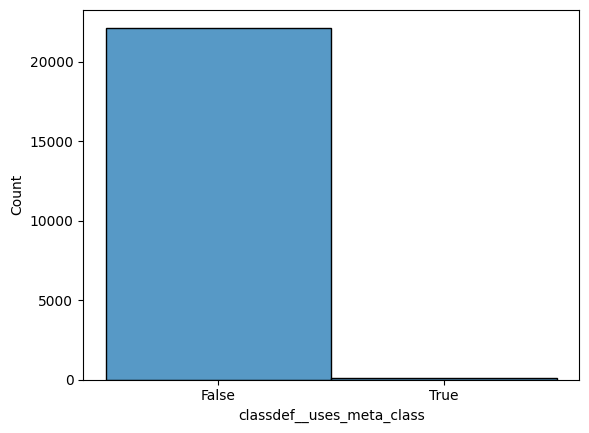

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__uses_meta_class'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__uses_meta_class'] == True])
num_false_values = len(X[X['classdef__uses_meta_class'] == False])
std = X['classdef__uses_meta_class'].std()
freq_true = len(X[X['classdef__uses_meta_class'] == True]) / len(X['classdef__uses_meta_class'])
freq_false = len(X[X['classdef__uses_meta_class'] == False]) / len(X['classdef__uses_meta_class'])
print(f'La variable uses_meta_class contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable uses_meta_class a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable uses_meta_class a False es {freq_false}.')

La variable uses_meta_class contiene 73 valores verdaderos y 22152 valores falsos. Y, la desviación típica es de 0.05721842497587204
La frecuencia con la que programa puede tener la variable uses_meta_class a True es 0.00328458942632171.
La frecuencia con la que programa puede tener la variable uses_meta_class a False es 0.9967154105736783.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__uses_meta_class', possible_values)

La variable classdef__uses_meta_class contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__uses_meta_class toma el valor de 0.0 en un 99.67% de los items.
La variable classdef__uses_meta_class toma el valor de 1.0 en un 0.3285% de los items.


In [26]:
X[X['classdef__uses_meta_class'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,73.0,73.000000,73.000000,73.000000,73.000000,73.0,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.000000,73.000000
mean,0.0,13.109589,0.178082,6.164383,0.369863,0.0,0.684932,7.383562,0.061406,0.175273,...,0.037465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.287671,0.712329
std,0.0,4.057098,0.385230,5.920805,0.634798,0.0,0.467758,5.891685,0.131925,0.223567,...,0.137794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.455810,0.455810
min,0.0,6.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,11.000000,0.000000,3.000000,0.000000,0.0,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,13.000000,0.000000,5.000000,0.000000,0.0,1.000000,7.000000,0.000000,0.100000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
75%,0.0,14.000000,0.000000,8.000000,1.000000,0.0,1.000000,8.000000,0.000000,0.250000,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000
max,0.0,25.000000,1.000000,45.000000,2.000000,0.0,1.000000,46.000000,0.500000,1.000000,...,0.833333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


### Variable number_of_characters (5/23)
Esta variable representa el número de caracteres que tiene el nombre de la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 52. Con una media de 13.96.

<Axes: ylabel='classdef__number_of_characters'>

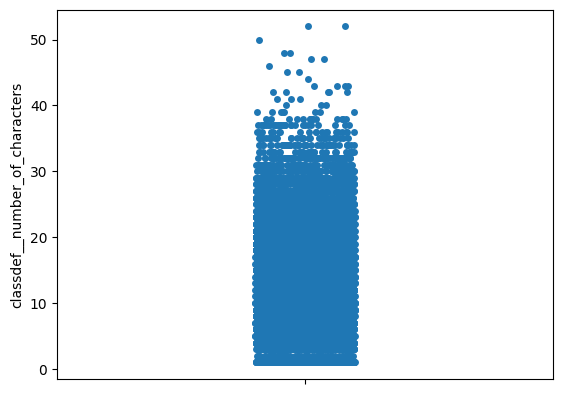

In [27]:
sns.stripplot(X['classdef__number_of_characters'])

In [28]:
print_outliers_for_df_column(X, 'classdef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.604310679255813
Rango valores atípicos extremos (Tukey): [-18.0,45.0]
Rango valores atípicos leves (Tukey): [-4.5,31.5]
Rango valores atípicos extremos (Fixed BoxPlot): [7.371592883221259,169.40106910946787]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_characters inferior a -18.0 (Q1-3*IQR) para classdef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_characters inferior a -4.5 (Q1-1.5*IQR) para classdef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 294 instancias tienen un valor para classdef__number_of_characters superior a 31.5 (Q3+1.5*IQR) para classdef__number_of_characters. Representando un 1.323% del total de instancias.
+3.0IQR: 8 instancias tienen un valor para classdef__number_of_characters superior a 45.0 (Q3-3*IQR) para classdef__number_of_characters. Representando un 0.036% del to

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 45.0 (Con un MC de 60 usamos Tuckey Extremo)

In [29]:
X[X['classdef__number_of_characters'] > 45.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,8.0,8.00000,8.00000,8.000000,8.0,8.0,8.000000,8.00000,8.000000,8.000000,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
mean,0.0,48.75000,0.75000,1.875000,1.0,0.0,0.500000,2.62500,0.104167,0.191667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.0,2.31455,0.46291,1.125992,0.0,0.0,0.534522,1.06066,0.197956,0.225902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,46.00000,0.00000,1.000000,1.0,0.0,0.000000,2.00000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,47.00000,0.75000,1.000000,1.0,0.0,0.000000,2.00000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,48.00000,1.00000,1.500000,1.0,0.0,0.500000,2.00000,0.000000,0.100000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,50.50000,1.00000,2.250000,1.0,0.0,1.000000,3.00000,0.083333,0.375000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.0,52.00000,1.00000,4.000000,1.0,0.0,1.000000,5.00000,0.500000,0.500000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### IMPORTANTE
Todo clases de expertos con nombres muy largos y concretos.

### Variable number_of_decorators (6/23)
Esta variable representa el número de decoradores que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 5. Con una media de 0.14.

<Axes: ylabel='classdef__number_of_decorators'>

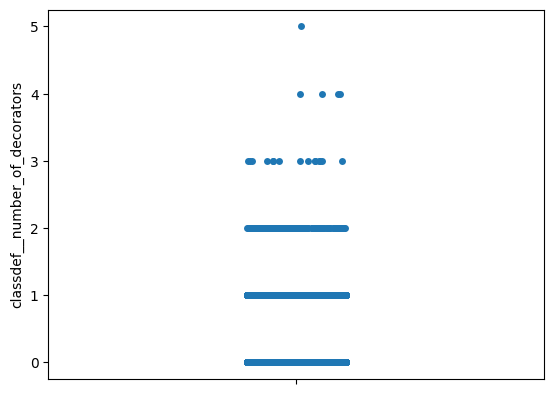

In [30]:
sns.stripplot(X['classdef__number_of_decorators'])

In [31]:
print_outliers_for_df_column(X, 'classdef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7994502403929074
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para classdef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para classdef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 2918 instancias tienen un valor para classdef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para classdef__number_of_decorators. Representando un 13.13% del total de instancias.
+3.0IQR: 2918 instancias tienen un valor para classdef__number_of_decorators superior a 0.0 (Q3-3*IQR) para classdef__number_of_decorators. Representando un 13.13% del total de instancias.
L: 0 instancias

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [32]:
X[X['classdef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.0,2918.000000,2918.000000,2918.000000,2918.000000,...,2918.000000,2918.000000,2918.000000,2918.0,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,0.006854,11.433517,1.066484,3.034270,0.345785,0.0,0.308430,4.404387,0.157193,0.069183,...,0.024604,0.001371,0.903016,0.0,0.002056,0.012337,0.003084,0.078136,0.003084,0.996916
std,0.082519,7.229491,0.291052,5.242968,0.511809,0.0,0.461924,6.144663,0.305406,0.136089,...,0.112092,0.037005,0.295987,0.0,0.045306,0.110405,0.055460,0.268431,0.055460,0.055460
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,1.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,10.000000,1.000000,2.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,16.000000,1.000000,3.000000,1.000000,0.0,1.000000,5.000000,0.100000,0.090909,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,52.000000,5.000000,98.000000,3.000000,0.0,1.000000,99.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 86% de las clases no tienen decoradores.

De las clases con decoradores, el 99,7% son de expertos.

### Variable number_of_methods (7/23)
Esta variable representa el número de métodos en la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 231. Con una media de 4.154.

<Axes: ylabel='classdef__number_of_methods'>

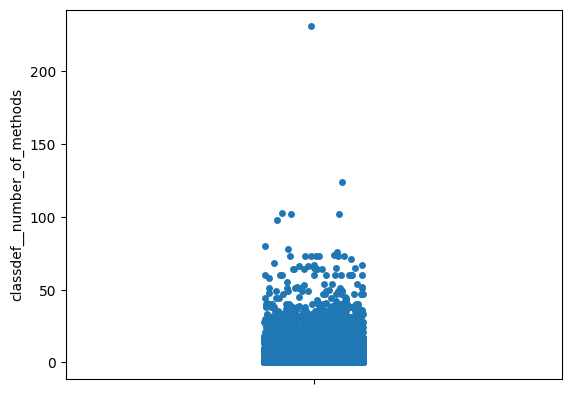

In [33]:
sns.stripplot(X['classdef__number_of_methods'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [34]:
print_outliers_for_df_column(X, 'classdef__number_of_methods')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7973183733642417
Rango valores atípicos extremos (Tukey): [-11.0,17.0]
Rango valores atípicos leves (Tukey): [-5.0,11.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.6316990357951104,150.62472889966375]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_methods inferior a -11.0 (Q1-3*IQR) para classdef__number_of_methods. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_methods inferior a -5.0 (Q1-1.5*IQR) para classdef__number_of_methods. Representando un 0.0% del total de instancias.
+1.5IQR: 1682 instancias tienen un valor para classdef__number_of_methods superior a 11.0 (Q3+1.5*IQR) para classdef__number_of_methods. Representando un 7.568% del total de instancias.
+3.0IQR: 710 instancias tienen un valor para classdef__number_of_methods superior a 17.0 (Q3-3*IQR) para classdef__number_of_methods. Representando un 3.195% del total de instancias.


Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 17 (Con un MC de 79 usamos Tuckey)

In [35]:
X[X['classdef__number_of_methods'] > 17].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,710.0,710.000000,710.000000,710.000000,710.000000,710.0,710.000000,710.000000,710.000000,710.000000,...,710.000000,710.0,710.000000,710.0,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,0.0,12.740845,0.070423,29.832394,0.840845,0.0,0.708451,33.290142,0.067749,0.025356,...,0.085951,0.0,0.926761,0.0,0.018310,0.025352,0.028169,0.001408,0.459155,0.540845
std,0.0,5.105145,0.272063,15.763907,1.744229,0.0,0.454796,16.815611,0.100825,0.024043,...,0.187077,0.0,0.260713,0.0,0.134164,0.157303,0.165572,0.037529,0.498680,0.498680
min,0.0,3.000000,0.000000,18.000000,0.000000,0.0,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,9.000000,0.000000,20.000000,0.000000,0.0,0.000000,23.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,12.000000,0.000000,25.000000,1.000000,0.0,1.000000,28.000000,0.023810,0.027027,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.0,15.000000,0.000000,34.000000,1.000000,0.0,1.000000,37.000000,0.100000,0.040000,...,0.074769,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.0,33.000000,3.000000,231.000000,45.000000,0.0,1.000000,232.000000,0.551020,0.233333,...,0.903846,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Hay que revisar ese con el máximo de 231

In [36]:
X[X['classdef__number_of_methods'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,4252.000000,4252.000000,4252.000000,4252.0,4252.000000,4252.0,4252.000000,4252.000000,4252.000000,4252.000000,...,4252.0,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000
mean,0.063029,14.888288,0.104186,0.0,0.948730,0.0,0.470132,2.545626,0.471535,0.300271,...,0.0,0.001646,0.880056,0.001411,0.010113,0.070790,0.007761,0.028222,0.427799,0.572201
std,0.243044,6.806426,0.318358,0.0,0.486182,0.0,0.499166,4.101286,0.465626,0.384279,...,0.0,0.040546,0.324934,0.037543,0.100065,0.256504,0.087765,0.165626,0.494818,0.494818
min,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,0.0,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,0.0,1.000000,0.0,0.000000,1.000000,0.500000,0.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,19.000000,0.000000,0.0,1.000000,0.0,1.000000,2.000000,1.000000,0.500000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,45.000000,2.000000,0.0,3.000000,0.0,1.000000,71.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Más de 4000 clases sin métodos? 
* La mayoría usan al menos una base_class. Será herencia mal utilizada? 
* Un alto porcentaje tiene simplemente un comentario y una sentencia Pass. Todo apunta a herencia mal usada.

### Variable number_of_base_classes (8/23)
Esta variable representa el número de base_classes que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 45. Con una media de 0.83.

<Axes: ylabel='classdef__number_of_base_classes'>

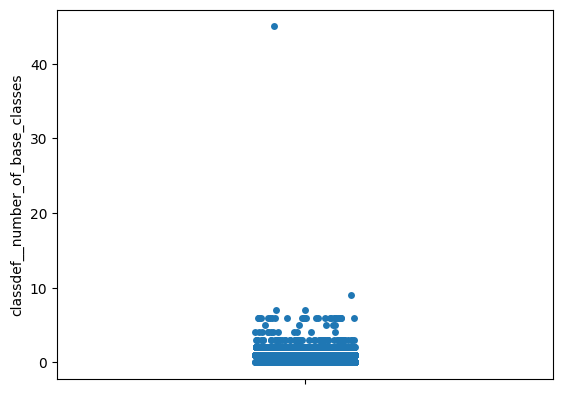

In [37]:
sns.stripplot(X['classdef__number_of_base_classes'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.
* Hay que comprobar la clase con 45 base classes. 
* Es una clase de experto de algún tipo de interfaz gráfica.

In [38]:
print_outliers_for_df_column(X, 'classdef__number_of_base_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4777777777777778
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 4935 instancias tienen un valor para classdef__number_of_base_classes inferior a 1.0 (Q1-3*IQR) para classdef__number_of_base_classes. Representando un 22.2% del total de instancias.
-1.5IQR: 4935 instancias tienen un valor para classdef__number_of_base_classes inferior a 1.0 (Q1-1.5*IQR) para classdef__number_of_base_classes. Representando un 22.2% del total de instancias.
+1.5IQR: 954 instancias tienen un valor para classdef__number_of_base_classes superior a 1.0 (Q3+1.5*IQR) para classdef__number_of_base_classes. Representando un 4.292% del total de instancias.
+3.0IQR: 954 instancias tienen un valor para classdef__number_of_base_classes superior a 1.0 (Q3-3*IQR) para classdef__number_of_base_classes. Representando un 4.292% del total de insta

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 (Todos los umbrales son 1)

In [39]:
X[X['classdef__number_of_base_classes'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.0,954.000000,954.000000,954.000000,954.000000,...,954.000000,954.0,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,0.164570,15.658281,0.051363,3.917191,2.280922,0.0,0.567086,6.194969,0.226556,0.185035,...,0.026462,0.0,0.908805,0.001048,0.015723,0.034591,0.025157,0.014675,0.296646,0.703354
std,0.370987,6.054717,0.225553,5.996542,1.610144,0.0,0.495739,6.812104,0.343373,0.277435,...,0.099513,0.0,0.288037,0.032376,0.124468,0.182838,0.156685,0.120312,0.457019,0.457019
min,0.000000,1.000000,0.000000,0.000000,2.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,2.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.000000,0.000000,1.000000,2.000000,0.0,1.000000,4.000000,0.000000,0.062500,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,19.000000,0.000000,6.000000,2.000000,0.0,1.000000,8.000000,0.333333,0.250000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,43.000000,2.000000,53.000000,45.000000,0.0,1.000000,59.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable average_stmts_method_body (9/23)
Esta variable representa el número medio de sentencias en los métodos de la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 114. Con una media de 2.9.

<Axes: ylabel='classdef__average_stmts_method_body'>

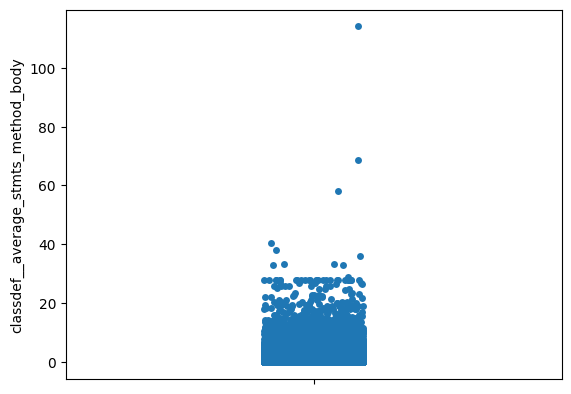

In [40]:
sns.stripplot(X['classdef__average_stmts_method_body'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [41]:
print_outliers_for_df_column(X, 'classdef__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8348786456853294
Rango valores atípicos extremos (Tukey): [-8.0,13.0]
Rango valores atípicos leves (Tukey): [-3.5,8.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.7578015537708025,130.9244439027019]
-3.0IQR: 0 instancias tienen un valor para classdef__average_stmts_method_body inferior a -8.0 (Q1-3*IQR) para classdef__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__average_stmts_method_body inferior a -3.5 (Q1-1.5*IQR) para classdef__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 1007 instancias tienen un valor para classdef__average_stmts_method_body superior a 8.5 (Q3+1.5*IQR) para classdef__average_stmts_method_body. Representando un 4.531% del total de instancias.
+3.0IQR: 271 instancias tienen un valor para classdef__average_stmts_method_body superior a 13.0 (Q3-3*IQR) para classdef__average_stmts_met

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 13 (Con un MC de 83 usamos Tuckey)

In [42]:
X[X['classdef__average_stmts_method_body'] > 13].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,271.0,271.000000,271.000000,271.000000,271.000000,271.0,271.000000,271.000000,271.000000,271.000000,...,271.000000,271.0,271.000000,271.0,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.0,15.243543,0.169742,3.564576,0.811808,0.0,0.354244,6.025830,0.187056,0.093228,...,0.003075,0.0,0.815498,0.0,0.011070,0.103321,0.051661,0.018450,0.239852,0.760148
std,0.0,6.976130,0.524199,5.893065,0.419003,0.0,0.479168,7.486486,0.280931,0.139819,...,0.036441,0.0,0.388611,0.0,0.104824,0.304941,0.221750,0.134822,0.427783,0.427783
min,0.0,3.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,10.000000,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.0,14.000000,0.000000,2.000000,1.000000,0.0,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.0,19.000000,0.000000,4.000000,1.000000,0.0,1.000000,7.000000,0.333333,0.200000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.0,38.000000,3.000000,78.000000,2.000000,0.0,1.000000,78.000000,0.933333,0.500000,...,0.500000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Hay una clase con una media de 114 sentencias en el cuerpo de los métodos.

### Variable body_count (10/23)
Esta variable representa el número de sentencias que tiene la clase en el root. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 618. Con una media de 5.76.

<Axes: ylabel='classdef__body_count'>

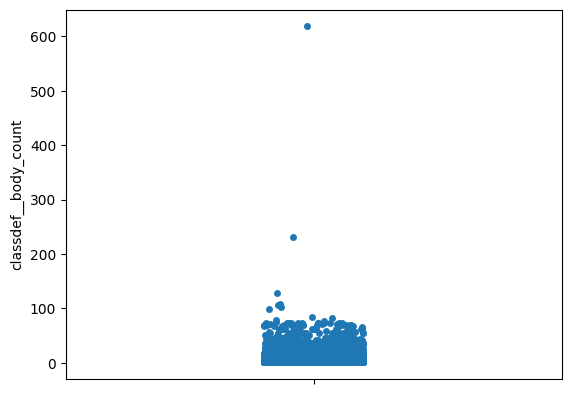

In [43]:
sns.stripplot(X['classdef__body_count'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [44]:
print_outliers_for_df_column(X, 'classdef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7716996898433706
Rango valores atípicos extremos (Tukey): [-13.0,22.0]
Rango valores atípicos leves (Tukey): [-5.5,14.5]
Rango valores atípicos extremos (Fixed BoxPlot): [1.496436719711581,171.30127413049615]
-3.0IQR: 0 instancias tienen un valor para classdef__body_count inferior a -13.0 (Q1-3*IQR) para classdef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__body_count inferior a -5.5 (Q1-1.5*IQR) para classdef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 1664 instancias tienen un valor para classdef__body_count superior a 14.5 (Q3+1.5*IQR) para classdef__body_count. Representando un 7.487% del total de instancias.
+3.0IQR: 725 instancias tienen un valor para classdef__body_count superior a 22.0 (Q3-3*IQR) para classdef__body_count. Representando un 3.262% del total de instancias.
L: 4226 instancias tienen un valor para classdef__body_co

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 171.3 (Con un MC de 77 usamos U)

In [45]:
X[X['classdef__body_count'] > 171].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2.0,2.000000,2.0,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.000000,...,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mean,0.0,13.000000,0.0,124.000000,0.500000,0.0,1.0,425.000000,0.237055,0.251346,...,0.002165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.0,2.828427,0.0,151.320847,0.707107,0.0,0.0,272.943207,0.335246,0.349361,...,0.003061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,11.000000,0.0,17.000000,0.000000,0.0,1.0,232.000000,0.000000,0.004310,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,12.000000,0.0,70.500000,0.250000,0.0,1.0,328.500000,0.118528,0.127828,...,0.001082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,13.000000,0.0,124.000000,0.500000,0.0,1.0,425.000000,0.237055,0.251346,...,0.002165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,14.000000,0.0,177.500000,0.750000,0.0,1.0,521.500000,0.355583,0.374864,...,0.003247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.0,15.000000,0.0,231.000000,1.000000,0.0,1.0,618.000000,0.474110,0.498382,...,0.004329,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### IMPORTANTE
Hay una clase con 618 sentencias en el root.  

### Variable number_of_keywords (11/23)
Esta variable representa el número de keywords diferentes de metaclass que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 2. Con una media de 0.00054.

<Axes: ylabel='classdef__number_of_keywords'>

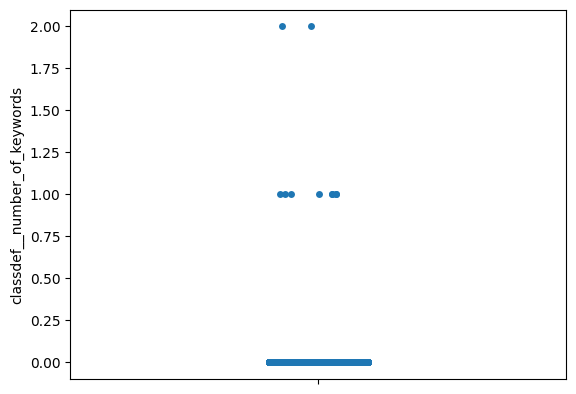

In [46]:
sns.stripplot(X['classdef__number_of_keywords'])

In [47]:
print_outliers_for_df_column(X, 'classdef__number_of_keywords')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9898015281592277
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_keywords inferior a 0.0 (Q1-3*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_keywords inferior a 0.0 (Q1-1.5*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
+1.5IQR: 10 instancias tienen un valor para classdef__number_of_keywords superior a 0.0 (Q3+1.5*IQR) para classdef__number_of_keywords. Representando un 0.04499% del total de instancias.
+3.0IQR: 10 instancias tienen un valor para classdef__number_of_keywords superior a 0.0 (Q3-3*IQR) para classdef__number_of_keywords. Representando un 0.04499% del total de instancias.
L: 0 instancias tienen un valor

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [48]:
X[X['classdef__number_of_keywords'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,10.0,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.000000,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,0.0,16.799999,0.700000,0.900000,1.0,0.0,0.800000,8.000000,0.809372,0.120459,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.0,3.489667,0.483046,1.449138,0.0,0.0,0.421637,6.182412,0.120404,0.093604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,12.000000,0.000000,0.000000,1.0,0.0,0.000000,1.000000,0.666667,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,14.500000,0.250000,0.000000,1.0,0.0,1.000000,4.250000,0.750000,0.053442,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,17.000000,1.000000,0.000000,1.0,0.0,1.000000,6.000000,0.780193,0.105556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,18.750000,1.000000,1.000000,1.0,0.0,1.000000,9.750000,0.875000,0.191667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.0,23.000000,1.000000,4.000000,1.0,0.0,1.000000,23.000000,1.000000,0.250000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### IMPORTANTE
Todas las clases que tienen keywords son de expertos

### Variable height (12/23)
Esta variable representa la distancia a la raiz del modulo en la que se encuentra la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 8. Con una media de 1.17.

<Axes: ylabel='classdef__height'>

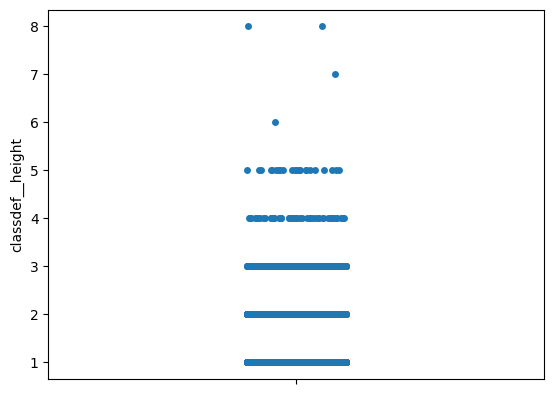

In [49]:
sns.stripplot(X['classdef__height'])

In [50]:
print_outliers_for_df_column(X, 'classdef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para classdef__height inferior a 1.0 (Q1-3*IQR) para classdef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__height inferior a 1.0 (Q1-1.5*IQR) para classdef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 2864 instancias tienen un valor para classdef__height superior a 1.0 (Q3+1.5*IQR) para classdef__height. Representando un 12.89% del total de instancias.
+3.0IQR: 2864 instancias tienen un valor para classdef__height superior a 1.0 (Q3-3*IQR) para classdef__height. Representando un 12.89% del total de instancias.
L: 0 instancias tienen un valor para classdef__height inferior a 1.0 para classdef__height. Representando un 0.0% del total de instancias.
U: 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 (Todos los umbrales son 1)

In [51]:
X[X['classdef__height'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.0,2864.000000,2864.000000,2864.000000,2864.000000,...,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,0.012570,9.629539,0.401536,2.134427,0.517109,0.0,0.111034,2.898045,0.160721,0.044804,...,0.004042,0.000349,0.807612,0.003142,0.011173,0.059707,0.012570,0.105447,0.266061,0.733939
std,0.111428,6.037429,0.519354,3.624983,0.604778,0.0,0.314229,4.321285,0.322579,0.150422,...,0.051632,0.018686,0.394245,0.055979,0.105129,0.236984,0.111428,0.307182,0.441974,0.441974
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,9.000000,0.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,13.000000,1.000000,2.000000,1.000000,0.0,0.000000,3.000000,0.059524,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,44.000000,2.000000,51.000000,9.000000,0.0,1.000000,56.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Hay que revisar los que tiene profundidad 8. 
* Ambas son clases vacias con una sentencia Pass en programas de expertos.

### Variable assignments_pct (13/23)
Esta variable representa la proporción de las sentencias en el root de la clase que son asignaciones. Toma los valores de 0.0 - 1.0. La media es 0.157.

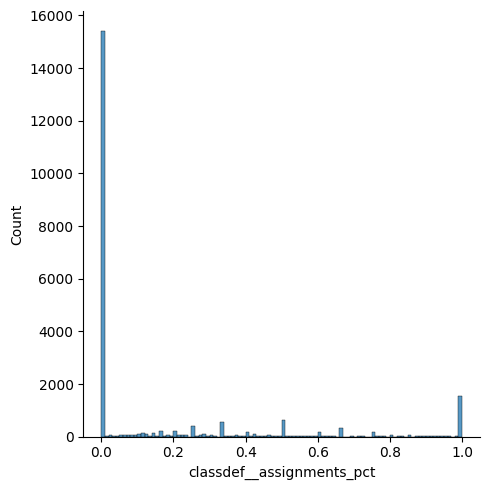

In [52]:
sns.displot(X['classdef__assignments_pct'], bins=[i / 100 for i in range(0, 101)])

In [53]:
print_outliers_for_df_column(X, 'classdef__assignments_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6605378836393356
Rango valores atípicos extremos (Tukey): [-0.5454545617103577,0.7272727489471436]
Rango valores atípicos leves (Tukey): [-0.27272728085517883,0.4545454680919647]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.027020335033445496,4.011832653315237]
-3.0IQR: 0 instancias tienen un valor para classdef__assignments_pct inferior a -0.5454545617103577 (Q1-3*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__assignments_pct inferior a -0.27272728085517883 (Q1-1.5*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 3417 instancias tienen un valor para classdef__assignments_pct superior a 0.4545454680919647 (Q3+1.5*IQR) para classdef__assignments_pct. Representando un 15.37% del total de instancias.
+3.0IQR: 1997 instancias tienen un valor para classdef__assignments_pct superior a 0.727272

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.72 (Con un MC de 66 usamos U)

In [54]:
X[X['classdef__assignments_pct'] > 0.72].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.0,2004.000000,2004.000000,2004.000000,2004.000000,...,2004.000000,2004.000000,2004.000000,2004.0,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000
mean,0.113273,13.807385,0.148703,0.122255,0.861277,0.0,0.170659,4.408683,0.957480,0.027159,...,0.004907,0.000499,0.847804,0.0,0.019960,0.090818,0.004491,0.036427,0.197106,0.802894
std,0.317006,6.496885,0.373676,0.469248,0.522788,0.0,0.376304,6.301791,0.084214,0.067004,...,0.066331,0.022338,0.359300,0.0,0.139898,0.287422,0.066881,0.187397,0.397912,0.397912
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.727273,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,13.000000,0.000000,0.000000,1.000000,0.0,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,17.000000,0.000000,0.000000,1.000000,0.0,0.000000,5.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,37.000000,2.000000,6.000000,3.000000,0.0,1.000000,71.000000,1.000000,0.250000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 69% de las clases no tienen asignaciones en el root.

### Variable expressions_pct (14/23)
Esta variable representa la proporción de las sentencias en root de la clase que son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.143.

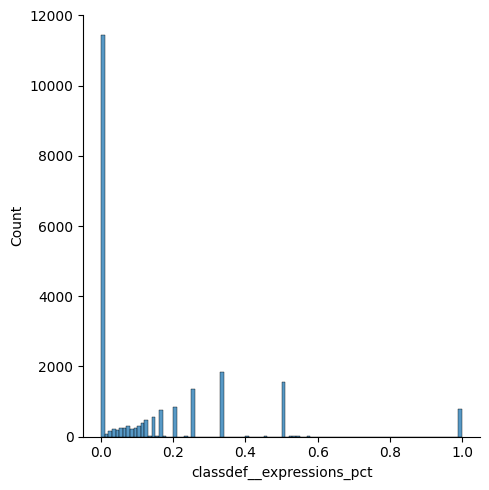

In [55]:
sns.displot(X['classdef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [56]:
print_outliers_for_df_column(X, 'classdef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.43397606769169567
Rango valores atípicos extremos (Tukey): [-0.75,1.0]
Rango valores atípicos leves (Tukey): [-0.375,0.625]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0821058927411949,2.377771137982303]
-3.0IQR: 0 instancias tienen un valor para classdef__expressions_pct inferior a -0.75 (Q1-3*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__expressions_pct inferior a -0.375 (Q1-1.5*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 796 instancias tienen un valor para classdef__expressions_pct superior a 0.625 (Q3+1.5*IQR) para classdef__expressions_pct. Representando un 3.582% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__expressions_pct superior a 1.0 (Q3-3*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
L: 0 instancias 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.625 (Con un MC de 43 usamos Tuckey)

In [57]:
X[X['classdef__expressions_pct'] > 0.625].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,796.0,796.000000,796.000000,796.0,796.000000,796.0,796.000000,796.000000,796.000000,796.000000,...,796.0,796.0,796.000000,796.0,796.000000,796.000000,796.0,796.0,796.000000,796.000000
mean,0.0,17.982412,0.012563,0.0,1.084171,0.0,0.993719,1.005025,0.000838,0.999163,...,0.0,0.0,0.868090,0.0,0.007538,0.124372,0.0,0.0,0.868090,0.131910
std,0.0,6.853889,0.111448,0.0,0.299603,0.0,0.079056,0.100188,0.016698,0.016698,...,0.0,0.0,0.338605,0.0,0.086546,0.330213,0.0,0.0,0.338605,0.338605
min,0.0,3.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.666667,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.0,13.000000,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000
50%,0.0,17.000000,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000
75%,0.0,21.000000,0.000000,0.0,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000
max,0.0,35.000000,1.000000,0.0,2.000000,0.0,1.000000,3.000000,0.333333,1.000000,...,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000


### IMPORTANTE
El 51% de las clases no tienen expresiones en el root.

### Variable type_annotations_pct (15/23)
Esta variable representa la proporción de parámetros y returns con anotacion de tipo en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.125. 

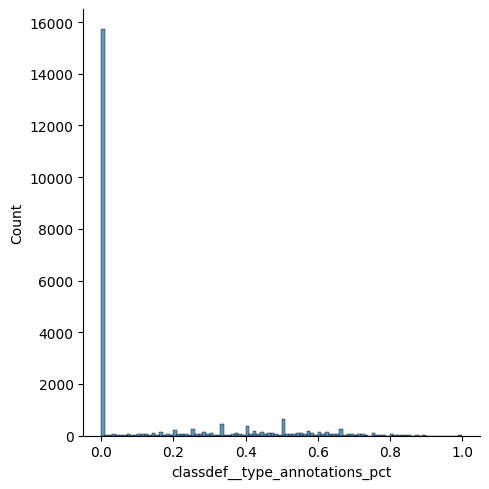

In [58]:
sns.displot(X['classdef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [59]:
print_outliers_for_df_column(X, 'classdef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.452391001819802
Rango valores atípicos extremos (Tukey): [-0.6000000089406967,0.800000011920929]
Rango valores atípicos leves (Tukey): [-0.30000000447034836,0.5000000074505806]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0615847320315989,2.0323352009775726]
-3.0IQR: 0 instancias tienen un valor para classdef__type_annotations_pct inferior a -0.6000000089406967 (Q1-3*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__type_annotations_pct inferior a -0.30000000447034836 (Q1-1.5*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 2136 instancias tienen un valor para classdef__type_annotations_pct superior a 0.5000000074505806 (Q3+1.5*IQR) para classdef__type_annotations_pct. Representando un 9.611% del total de instancias.
+3.0IQR: 139 instancias tienen un valor para classdef__type_anno

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.80 (Con un MC de 45 usamos Tuckey Extremo)

In [60]:
X[X['classdef__type_annotations_pct'] > 0.80].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,139.0,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,...,139.000000,139.0,139.000000,139.0,139.0,139.000000,139.0,139.0,139.000000,139.000000
mean,0.0,15.079137,0.064748,2.208633,0.654676,0.0,0.582734,3.359712,0.104457,0.191152,...,0.024078,0.0,0.992806,0.0,0.0,0.007194,0.0,0.0,0.143885,0.856115
std,0.0,6.078073,0.246971,2.897962,0.586221,0.0,0.494891,3.426257,0.191203,0.184709,...,0.091620,0.0,0.084819,0.0,0.0,0.084819,0.0,0.0,0.352242,0.352242
min,0.0,4.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,0.0,10.000000,0.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
50%,0.0,15.000000,0.000000,1.000000,1.000000,0.0,1.000000,3.000000,0.000000,0.200000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
75%,0.0,20.000000,0.000000,2.000000,1.000000,0.0,1.000000,4.000000,0.200000,0.333333,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
max,0.0,34.000000,1.000000,28.000000,2.000000,0.0,1.000000,29.000000,0.846154,0.500000,...,0.500000,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000


### IMPORTANTE
El 70% de las clases no tienen anotaciones de tipo.

### Variable private_methods_pct (16/23)
Esta variable representa la proporción de métodos que son privados en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.07

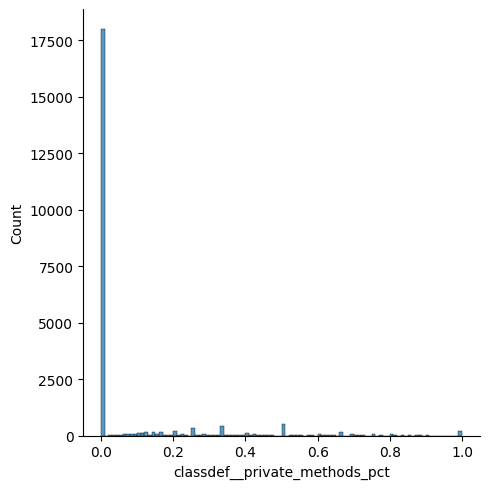

In [61]:
sns.displot(X['classdef__private_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [62]:
print_outliers_for_df_column(X, 'classdef__private_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7680686751730427
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__private_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__private_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__private_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__private_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 4251 instancias tienen un valor para classdef__private_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__private_methods_pct. Representando un 19.13% del total de instancias.
+3.0IQR: 4251 instancias tienen un valor para classdef__private_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__private_methods_pct. Representando un 19.13% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [63]:
X[X['classdef__private_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.0,4251.000000,4251.000000,4251.000000,4251.000000,...,4251.000000,4251.0,4251.000000,4251.0,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000
mean,0.000470,15.052929,0.091743,10.060926,0.892025,0.0,0.683604,12.411198,0.094020,0.085045,...,0.049484,0.0,0.915079,0.0,0.016467,0.038109,0.022818,0.007528,0.355681,0.644319
std,0.021688,6.157713,0.324026,10.506326,0.828811,0.0,0.465124,14.951366,0.155671,0.089240,...,0.129243,0.0,0.278797,0.0,0.127277,0.191481,0.149341,0.086445,0.478775,0.478775
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,0.000000,4.000000,1.000000,0.0,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,0.000000,7.000000,1.000000,0.0,1.000000,9.000000,0.000000,0.066667,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,19.000000,0.000000,12.000000,1.000000,0.0,1.000000,15.000000,0.142857,0.142857,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,44.000000,4.000000,231.000000,45.000000,0.0,1.000000,618.000000,0.846154,0.500000,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 80% de las clases no tienen métodos privados. Y hay cerca de un 1% de las clases tienen todos los métodos privados. Para que? Mal uso del POO?

### Variable magic_methods_pct (17/23)
Esta variable representa la proporción de métodos que son magic en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.266

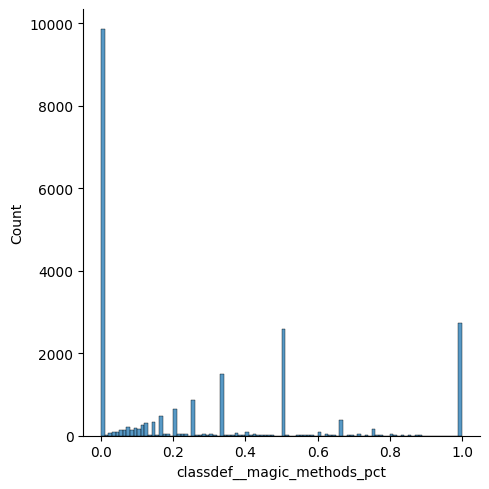

In [64]:
sns.displot(X['classdef__magic_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [65]:
print_outliers_for_df_column(X, 'classdef__magic_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3946652412414551
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.18843344397616713,4.136344404408943]
-3.0IQR: 0 instancias tienen un valor para classdef__magic_methods_pct inferior a -1.5 (Q1-3*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__magic_methods_pct inferior a -0.75 (Q1-1.5*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para classdef__magic_methods_pct superior a 1.25 (Q3+1.5*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__magic_methods_pct superior a 2.0 (Q3-3*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
L: 0 insta

In [66]:
X[X['classdef__magic_methods_pct'] == 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.0,2724.000000,2724.000000,2724.000000,2724.000000,...,2724.000000,2724.000000,2724.000000,2724.0,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000
mean,0.002570,13.052496,0.170338,1.649413,0.723201,0.0,0.453377,2.526432,0.061317,0.172555,...,0.000367,0.000367,0.745962,0.0,0.009912,0.119310,0.081498,0.042952,0.487518,0.512482
std,0.050637,6.633568,0.380851,1.274080,0.737559,0.0,0.497913,2.173277,0.177194,0.205852,...,0.019160,0.019160,0.435399,0.0,0.099082,0.324212,0.273648,0.202785,0.499936,0.499936
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,12.000000,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,17.000000,0.000000,2.000000,1.000000,0.0,1.000000,3.000000,0.000000,0.333333,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,52.000000,2.000000,12.000000,6.000000,0.0,1.000000,24.000000,0.958333,0.500000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 44% de las clases no tienen métodos magic. Y un 14% de las clases tienen todos los métodos magic.

### Variable async_methods_pct (18/23)
Esta variable representa la proporción de métodos que son asincronos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.024

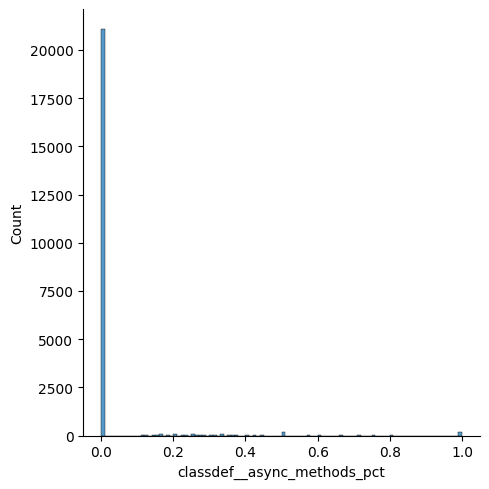

In [67]:
sns.displot(X['classdef__async_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [68]:
print_outliers_for_df_column(X, 'classdef__async_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8889404381142072
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__async_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__async_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__async_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__async_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1154 instancias tienen un valor para classdef__async_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__async_methods_pct. Representando un 5.192% del total de instancias.
+3.0IQR: 1154 instancias tienen un valor para classdef__async_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__async_methods_pct. Representando un 5.192% del total de instancias.
L: 0 instancias tienen un valor para cl

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [69]:
X[X['classdef__async_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,1154.0,1154.000000,1154.000000,1154.000000,1154.000000,1154.0,1154.000000,1154.000000,1154.000000,1154.000000,...,1154.000000,1154.000000,1154.000000,1154.0,1154.000000,1154.000000,1154.0,1154.000000,1154.000000,1154.000000
mean,0.0,14.569324,0.354419,6.531196,0.644714,0.0,0.485269,8.432409,0.077051,0.057368,...,0.044072,0.001733,0.939341,0.0,0.000867,0.010399,0.0,0.047660,0.005199,0.994801
std,0.0,6.954128,0.530135,5.775158,0.546480,0.0,0.500000,8.115452,0.150109,0.076939,...,0.099753,0.041612,0.238806,0.0,0.029437,0.101486,0.0,0.213139,0.071950,0.071950
min,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.0,10.000000,0.000000,2.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
50%,0.0,15.000000,0.000000,5.000000,1.000000,0.0,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,0.0,19.000000,1.000000,9.000000,1.000000,0.0,1.000000,11.000000,0.090909,0.100000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,0.0,39.000000,4.000000,50.000000,2.000000,0.0,1.000000,51.000000,0.666667,0.500000,...,0.625000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


### IMPORTANTE
Apenas el 5% de las clases tienen algun métodos asincronos.

### Variable class_methods_pct (19/23)
Esta variable representa la proporción de métodos que son de clase en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.028

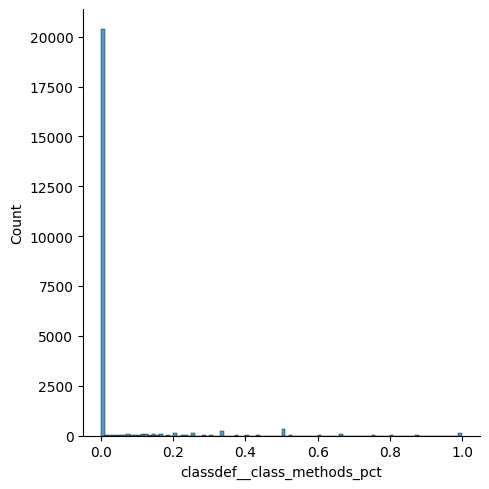

In [70]:
sns.displot(X['classdef__class_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [71]:
print_outliers_for_df_column(X, 'classdef__class_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8678986084416256
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__class_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__class_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__class_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__class_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1857 instancias tienen un valor para classdef__class_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__class_methods_pct. Representando un 8.355% del total de instancias.
+3.0IQR: 1857 instancias tienen un valor para classdef__class_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__class_methods_pct. Representando un 8.355% del total de instancias.
L: 0 instancias tienen un valor para cl

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [72]:
X[X['classdef__class_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,1857.000000,1857.00000,1857.000000,1857.000000,1857.000000,1857.0,1857.000000,1857.000000,1857.000000,1857.000000,...,1857.000000,1857.000000,1857.000000,1857.0,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000
mean,0.007001,14.84868,0.078083,7.936457,0.797523,0.0,0.595046,11.163705,0.200872,0.076196,...,0.046380,0.001077,0.939149,0.0,0.007539,0.021002,0.008616,0.022617,0.213247,0.786753
std,0.083398,6.18555,0.295146,8.668851,0.467631,0.0,0.491015,17.360004,0.233031,0.093666,...,0.112142,0.032809,0.239121,0.0,0.086523,0.143428,0.092447,0.148720,0.409711,0.409711
min,0.000000,1.00000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.00000,0.000000,3.000000,1.000000,0.0,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,14.00000,0.000000,5.000000,1.000000,0.0,1.000000,7.000000,0.090909,0.050000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,19.00000,0.000000,10.000000,1.000000,0.0,1.000000,13.000000,0.375000,0.125000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,39.00000,2.000000,102.000000,3.000000,0.0,1.000000,618.000000,0.909091,0.500000,...,0.800000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Menos del 9% de las clases tienen algún método de clase.

### Variable static_methods_pct (20/23)
Esta variable representa la proporción de métodos que son estaticos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.015.

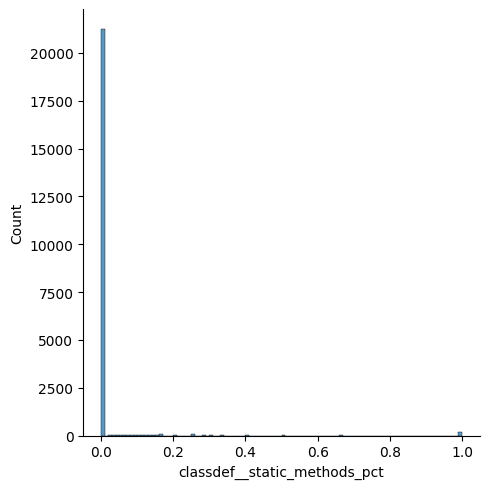

In [73]:
sns.displot(X['classdef__static_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [74]:
print_outliers_for_df_column(X, 'classdef__static_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9157719006504618
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__static_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__static_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__static_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__static_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 988 instancias tienen un valor para classdef__static_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__static_methods_pct. Representando un 4.445% del total de instancias.
+3.0IQR: 988 instancias tienen un valor para classdef__static_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__static_methods_pct. Representando un 4.445% del total de instancias.
L: 0 instancias tienen un valor p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [75]:
X[X['classdef__static_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000,...,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,0.001012,13.512146,0.104251,11.570850,0.772267,0.0,0.587045,15.118421,0.090047,0.077762,...,0.026547,0.001012,0.853239,0.0,0.033401,0.040486,0.063765,0.008097,0.398785,0.601215
std,0.031814,5.968412,0.315526,15.065814,0.501022,0.0,0.492614,25.817204,0.150112,0.109210,...,0.084219,0.031814,0.354047,0.0,0.179772,0.197196,0.244458,0.089665,0.489896,0.489896
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,4.000000,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,13.000000,0.000000,7.000000,1.000000,0.0,1.000000,9.000000,0.000000,0.035714,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,17.000000,0.000000,13.000000,1.000000,0.0,1.000000,17.000000,0.125000,0.125000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,43.000000,2.000000,231.000000,3.000000,0.0,1.000000,618.000000,0.838710,0.500000,...,0.827586,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 98% de las clases no tienen métodos estáticos.

### Variable abstract_methods_pct (21/23)
Esta variable representa la proporción de métodos que son abstractos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.006

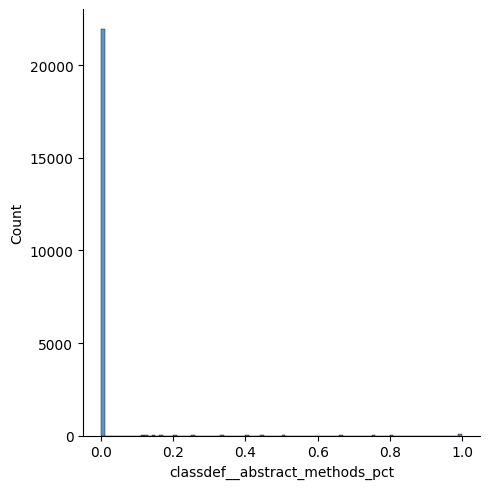

In [76]:
sns.displot(X['classdef__abstract_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [77]:
print_outliers_for_df_column(X, 'classdef__abstract_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9485103688897453
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__abstract_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__abstract_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__abstract_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__abstract_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 282 instancias tienen un valor para classdef__abstract_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__abstract_methods_pct. Representando un 1.269% del total de instancias.
+3.0IQR: 282 instancias tienen un valor para classdef__abstract_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__abstract_methods_pct. Representando un 1.269% del total de instancias.
L: 0 instancias t

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [78]:
X[X['classdef__abstract_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,282.0,282.000000,282.000000,282.000000,282.000000,282.0,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.0,282.000000,282.0,282.0,282.000000,282.0,282.0,282.000000,282.000000
mean,0.0,15.687943,0.056738,7.528369,1.156028,0.0,0.730496,9.039007,0.049760,0.139508,...,0.092036,0.0,0.989362,0.0,0.0,0.010638,0.0,0.0,0.039007,0.960993
std,0.0,5.649470,0.231752,6.928273,0.611674,0.0,0.444491,7.434308,0.115694,0.141993,...,0.203865,0.0,0.102774,0.0,0.0,0.102774,0.0,0.0,0.193956,0.193956
min,0.0,4.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,0.0,12.000000,0.000000,3.000000,1.000000,0.0,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
50%,0.0,15.000000,0.000000,5.000000,1.000000,0.0,1.000000,7.000000,0.000000,0.100000,...,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
75%,0.0,19.000000,0.000000,9.750000,1.000000,0.0,1.000000,12.000000,0.000000,0.200000,...,0.103947,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.000000
max,0.0,34.000000,1.000000,45.000000,3.000000,0.0,1.000000,46.000000,0.500000,0.500000,...,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000


### IMPORTANTE
Apenas un 1% de las clases tienen algún método abstracto.

### Variable property_methods_pct (22/23)
Esta variable representa la proporción de métodos que son property en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.032

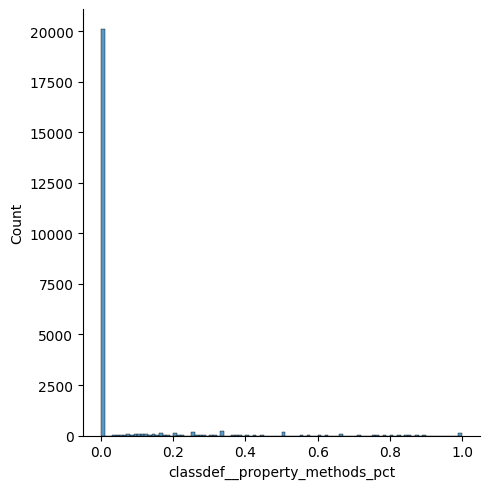

In [79]:
sns.displot(X['classdef__property_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [80]:
print_outliers_for_df_column(X, 'classdef__property_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8560477498898686
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__property_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__property_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__property_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__property_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 2136 instancias tienen un valor para classdef__property_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__property_methods_pct. Representando un 9.611% del total de instancias.
+3.0IQR: 2136 instancias tienen un valor para classdef__property_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__property_methods_pct. Representando un 9.611% del total de instancias.
L: 0 instancias

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [81]:
X[X['classdef__property_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__property_methods_pct,classdef__name_convention_CamelLow,classdef__name_convention_CamelUp,classdef__name_convention_Discard,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper,classdef__expertise_level_BEGINNER,classdef__expertise_level_EXPERT
count,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.0,2136.000000,2136.000000,2136.000000,2136.000000,...,2136.000000,2136.000000,2136.000000,2136.0,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000,2136.000000
mean,0.001873,14.103464,0.098783,10.047285,0.846910,0.0,0.614232,12.555712,0.123578,0.071988,...,0.333404,0.001404,0.928839,0.0,0.003745,0.048689,0.011236,0.006086,0.382022,0.617977
std,0.043244,6.009288,0.322575,10.772639,1.083178,0.0,0.486890,11.802301,0.184022,0.082464,...,0.250471,0.037459,0.257154,0.0,0.061099,0.215268,0.105427,0.077794,0.485996,0.485996
min,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.004329,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,0.000000,4.750000,1.000000,0.0,0.000000,6.000000,0.000000,0.000000,...,0.142857,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,13.000000,0.000000,8.000000,1.000000,0.0,1.000000,9.000000,0.000000,0.052632,...,0.250000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,18.000000,0.000000,12.000000,1.000000,0.0,1.000000,15.000000,0.191244,0.111111,...,0.500000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,37.000000,2.000000,231.000000,45.000000,0.0,1.000000,232.000000,0.975610,0.500000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 90% de las clases no tienen métodos property.

### Variable name_convention (23/23)
Esta variable es de tipo categórica y representa la name_convention del nombre de la clase.

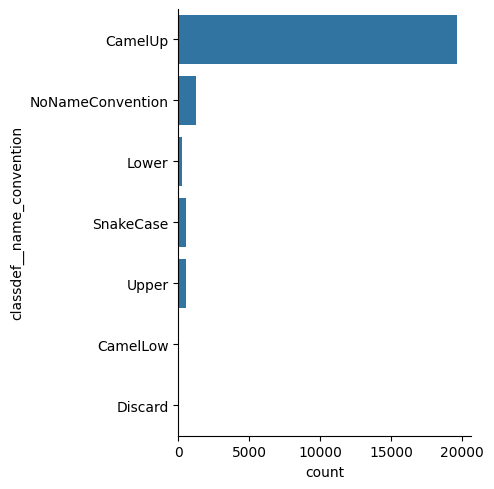

In [82]:
sns.catplot(full_table['classdef__name_convention'], kind="count")

In [83]:
print_frequency_anal_for_cat_var(full_table, 'classdef__name_convention')

La variable classdef__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable classdef__name_convention toma el valor de CamelUp en un 88.45% de los items.
La variable classdef__name_convention toma el valor de NoNameConvention en un 5.593% de los items.
La variable classdef__name_convention toma el valor de Upper en un 2.38% de los items.
La variable classdef__name_convention toma el valor de SnakeCase en un 2.313% de los items.
La variable classdef__name_convention toma el valor de Lower en un 1.03% de los items.
La variable classdef__name_convention toma el valor de CamelLow en un 0.189% de los items.
La variable classdef__name_convention toma el valor de Discard en un 0.04049% de los items.


### IMPORTANTE
Mas de un 10% no sigue el convenio de nombrado de clases de Python

## Multivariate

TODO: isolation forest algorithm

In [84]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,classdef__name_convention,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,...,classdef__average_stmts_method_body,classdef__type_annotations_pct,classdef__private_methods_pct,classdef__magic_methods_pct,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__expertise_level
812,Lower,False,4,0,9,0,False,False,39,0.666667,...,22.555555,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,BEGINNER
1329,Lower,False,4,0,9,0,False,False,39,0.666667,...,22.555555,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,BEGINNER
1356,Lower,False,4,0,9,0,False,False,39,0.666667,...,22.555555,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,BEGINNER
1691,NoNameConvention,False,14,0,1,0,False,False,14,0.857143,...,28.000000,0.5,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,BEGINNER
2344,NoNameConvention,False,14,0,1,0,False,False,14,0.857143,...,28.000000,0.5,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,BEGINNER
2552,NoNameConvention,False,14,0,1,0,False,False,14,0.857143,...,28.000000,0.5,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,BEGINNER
3000,NoNameConvention,False,14,0,1,0,False,False,14,0.857143,...,28.000000,0.5,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,BEGINNER
3597,NoNameConvention,False,14,0,1,0,False,False,14,0.857143,...,28.000000,0.5,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,BEGINNER
3839,NoNameConvention,False,14,0,1,0,False,False,14,0.857143,...,28.000000,0.5,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,BEGINNER
4245,NoNameConvention,False,14,0,1,0,False,False,14,0.857143,...,28.000000,0.5,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,BEGINNER


### IMPORTANTE
Analizar los 20 resultados obtenidos.